In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd

In [35]:
training_data_path = 'C:/Users/dnlrm/jenna-training-data'
jenna_label = 'jenna'
label_data_path = base_recs_path + '/' + jenna_label

In [36]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

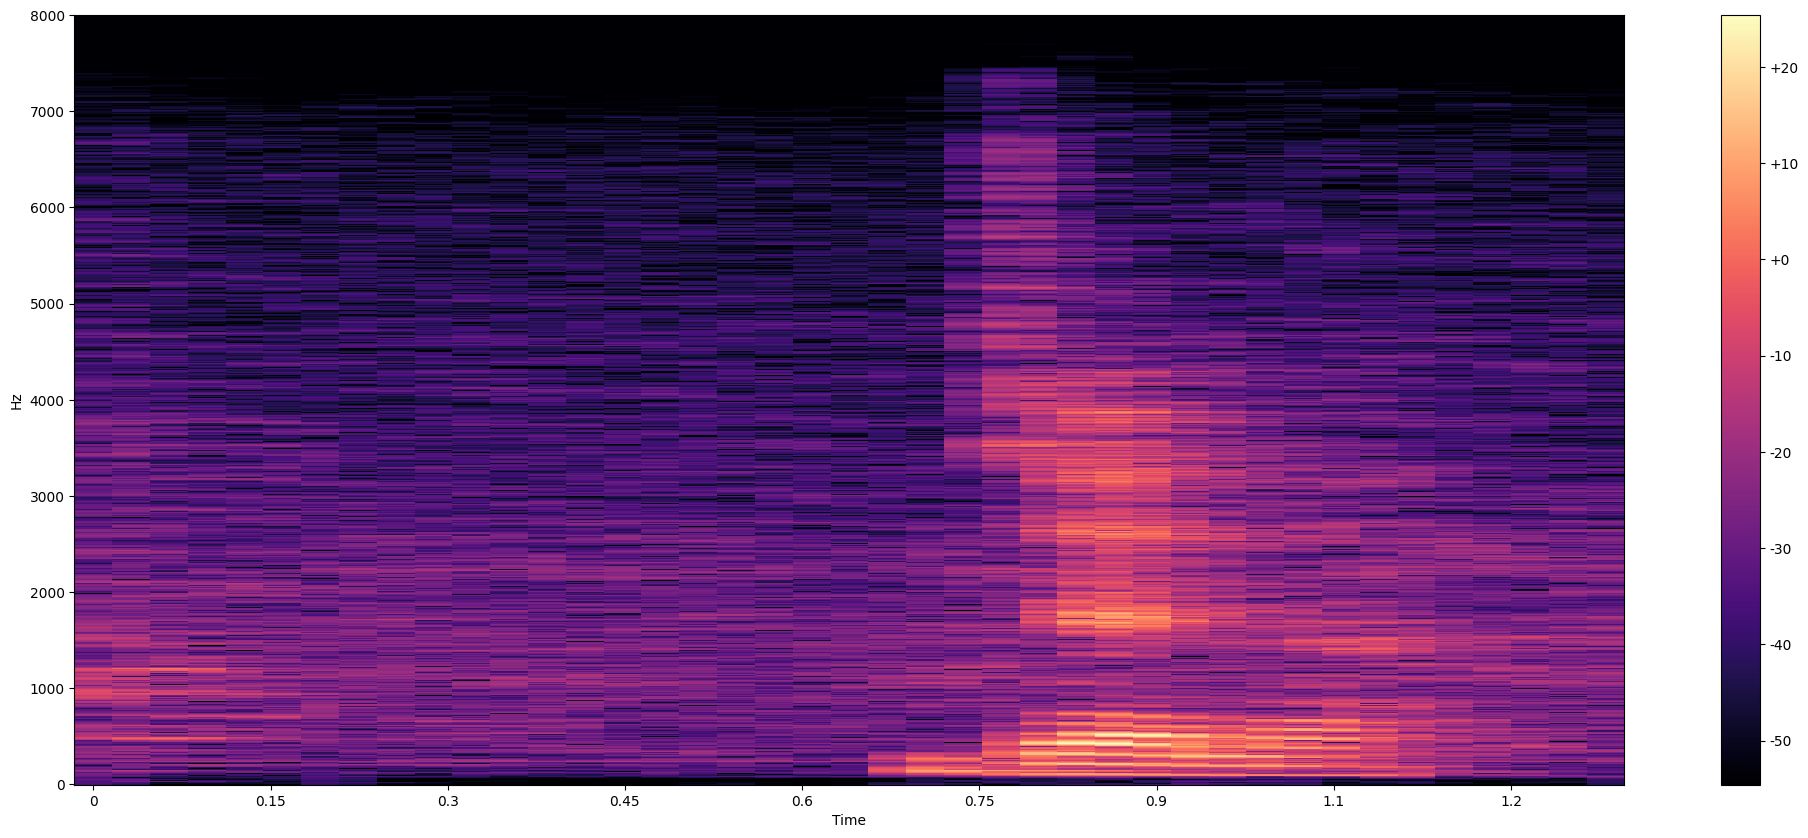

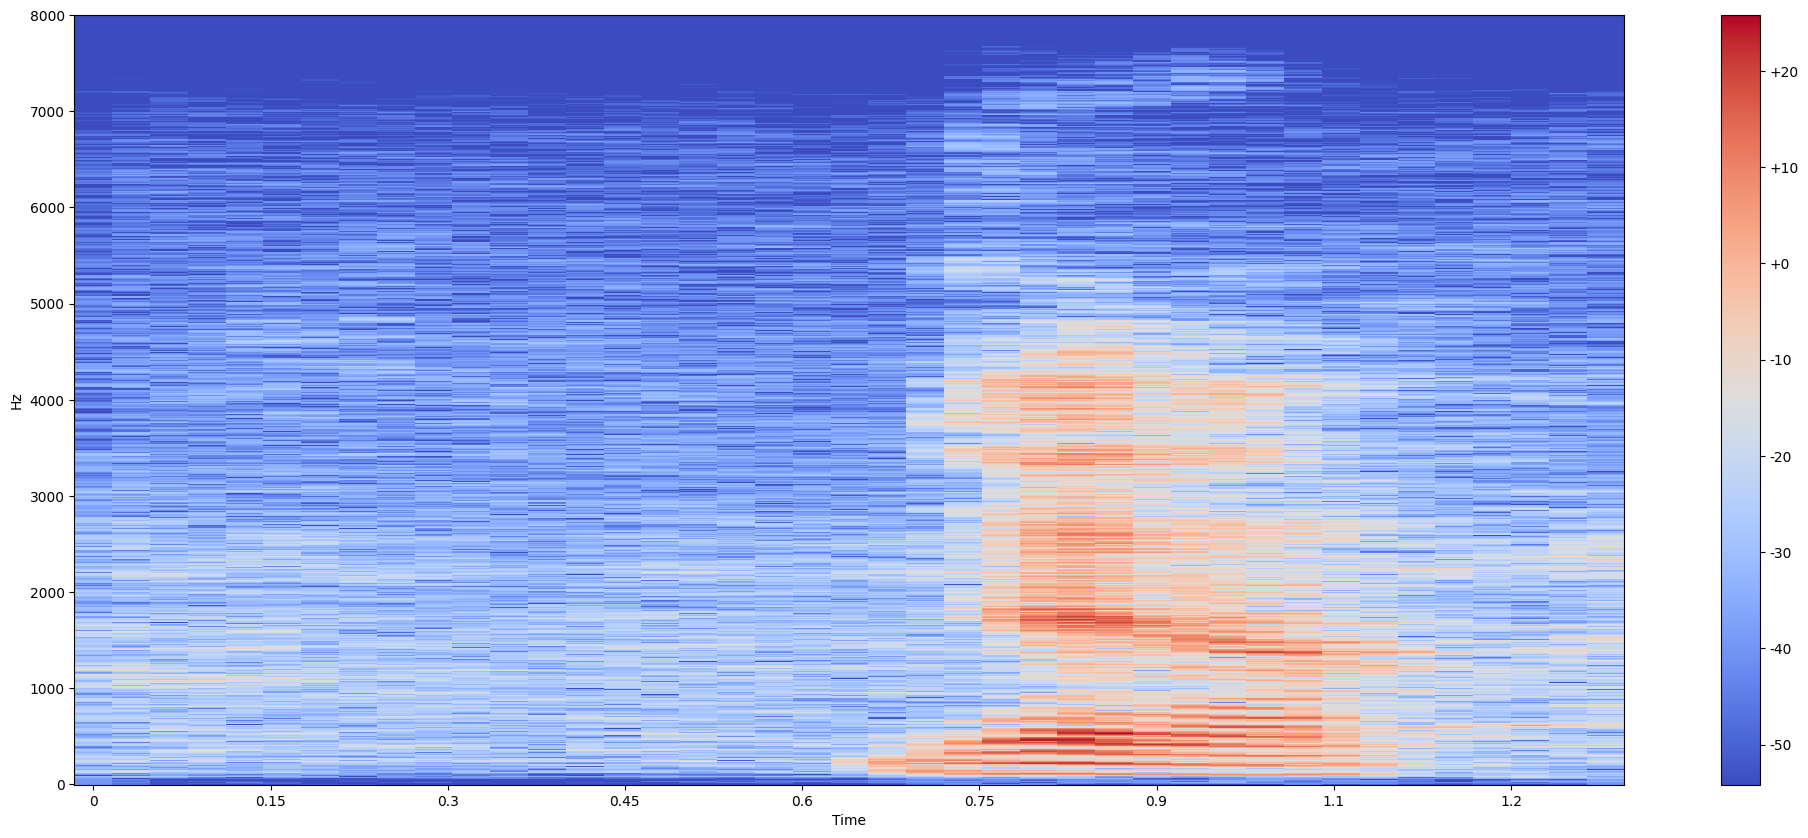

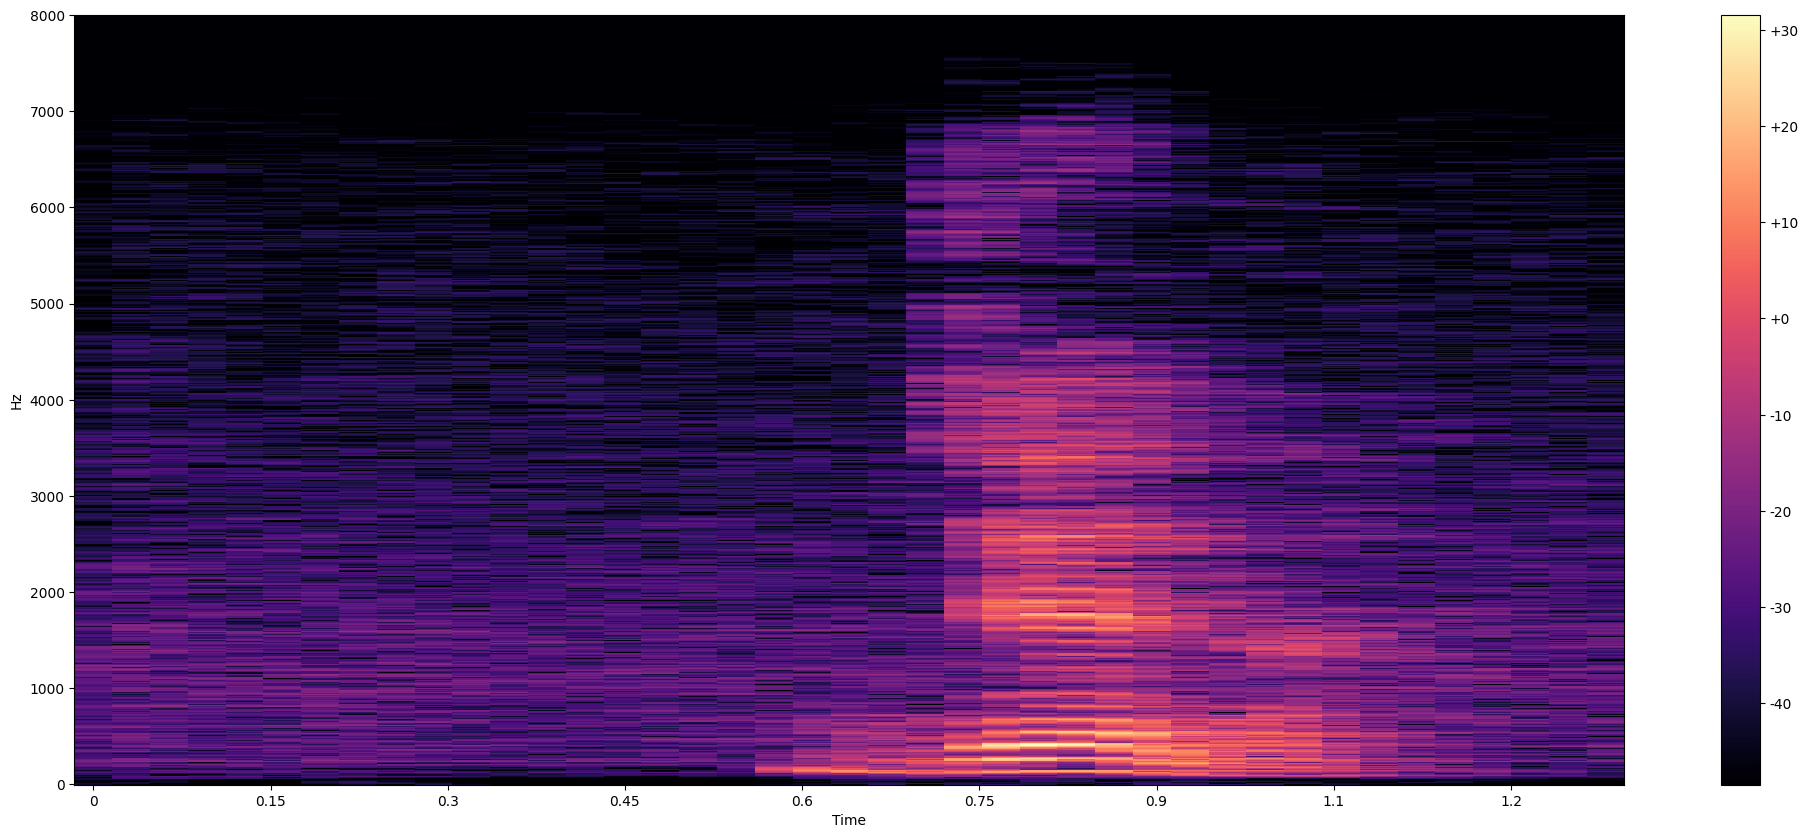

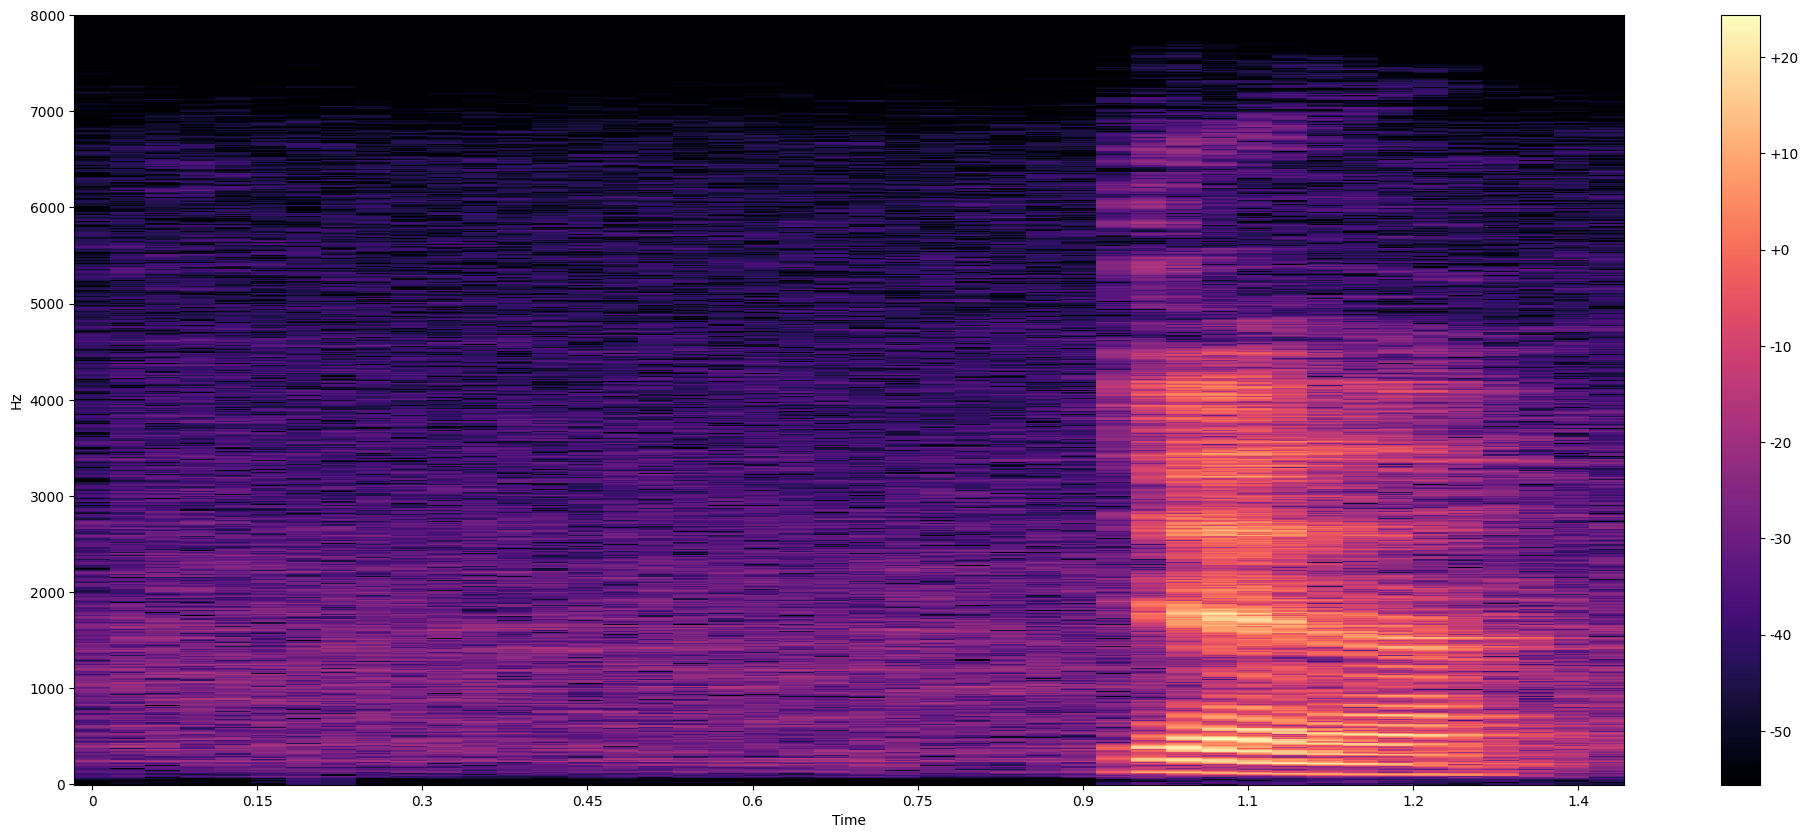

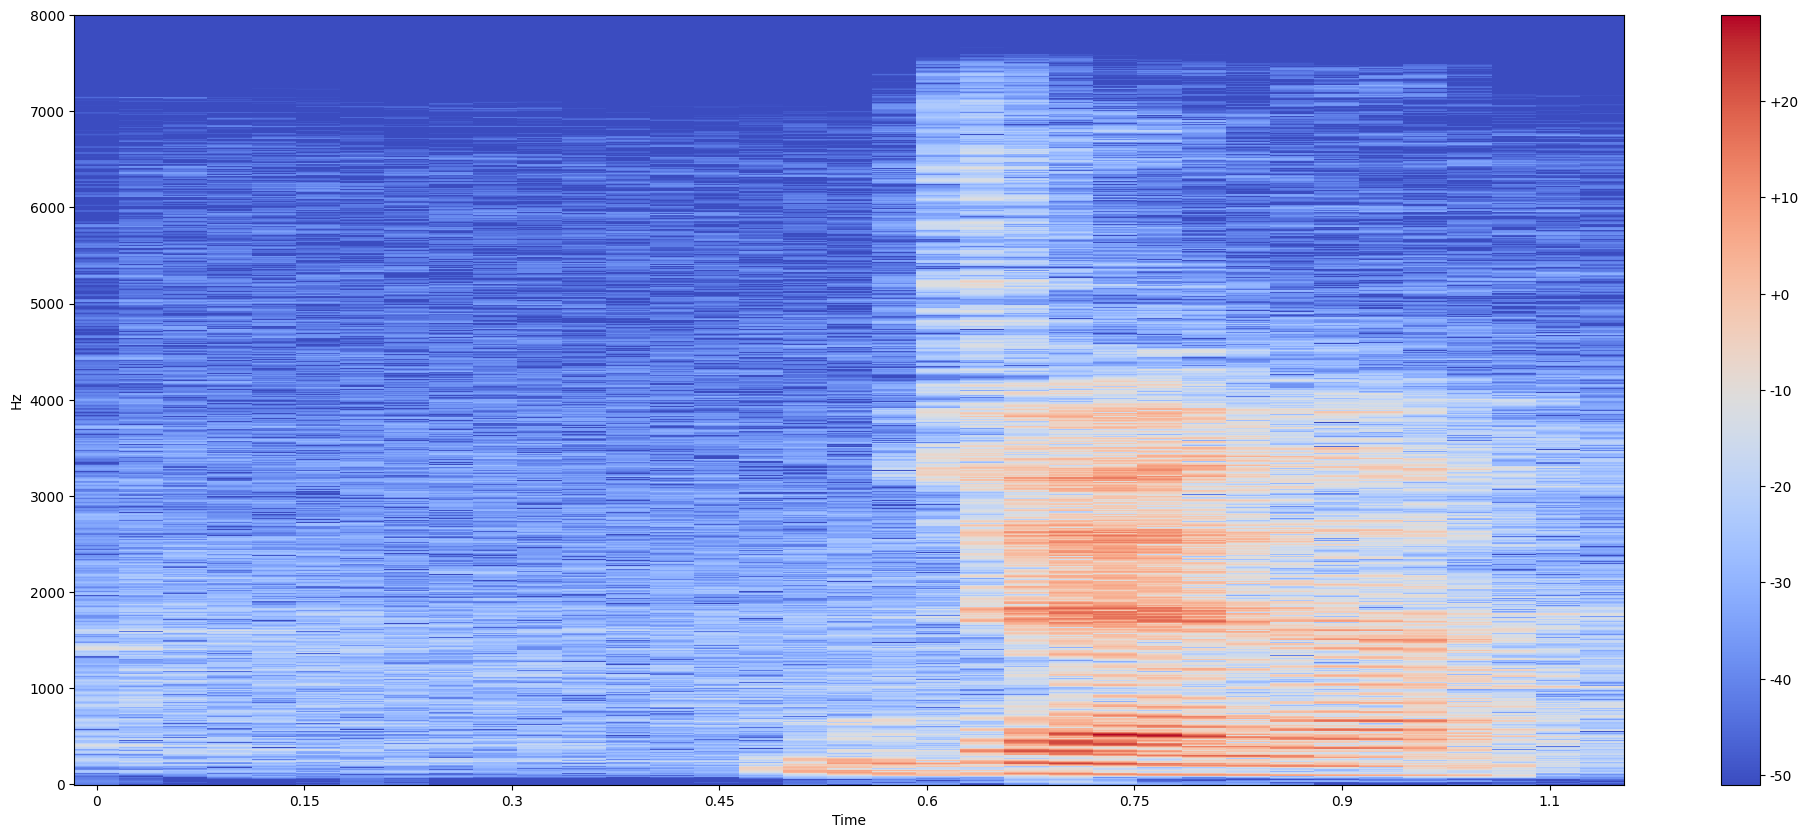

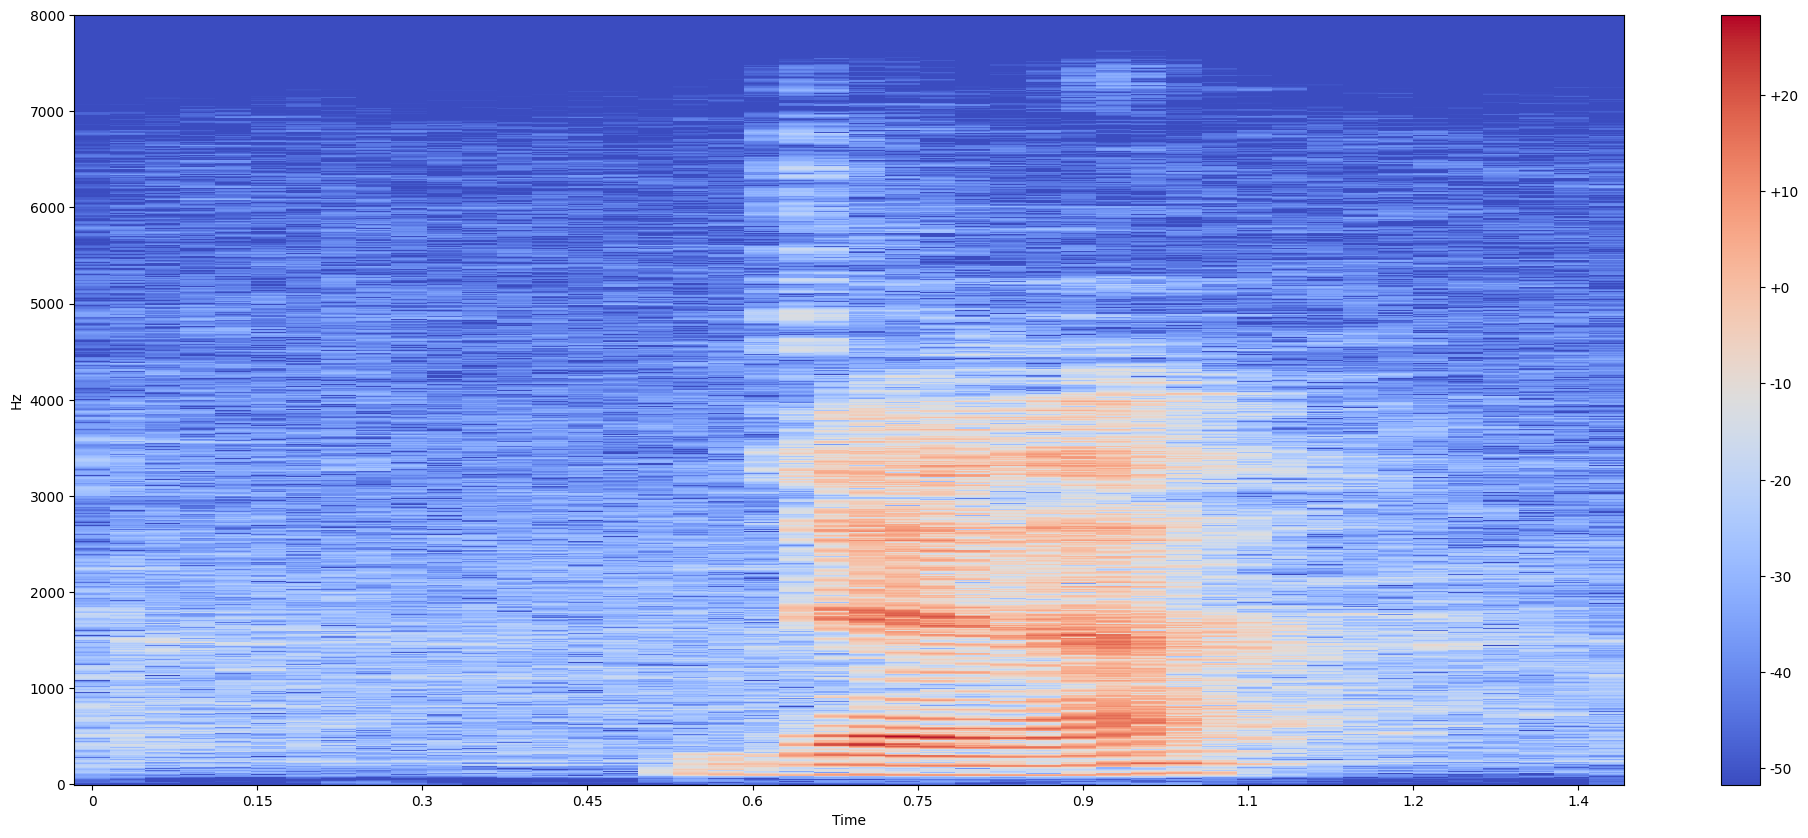

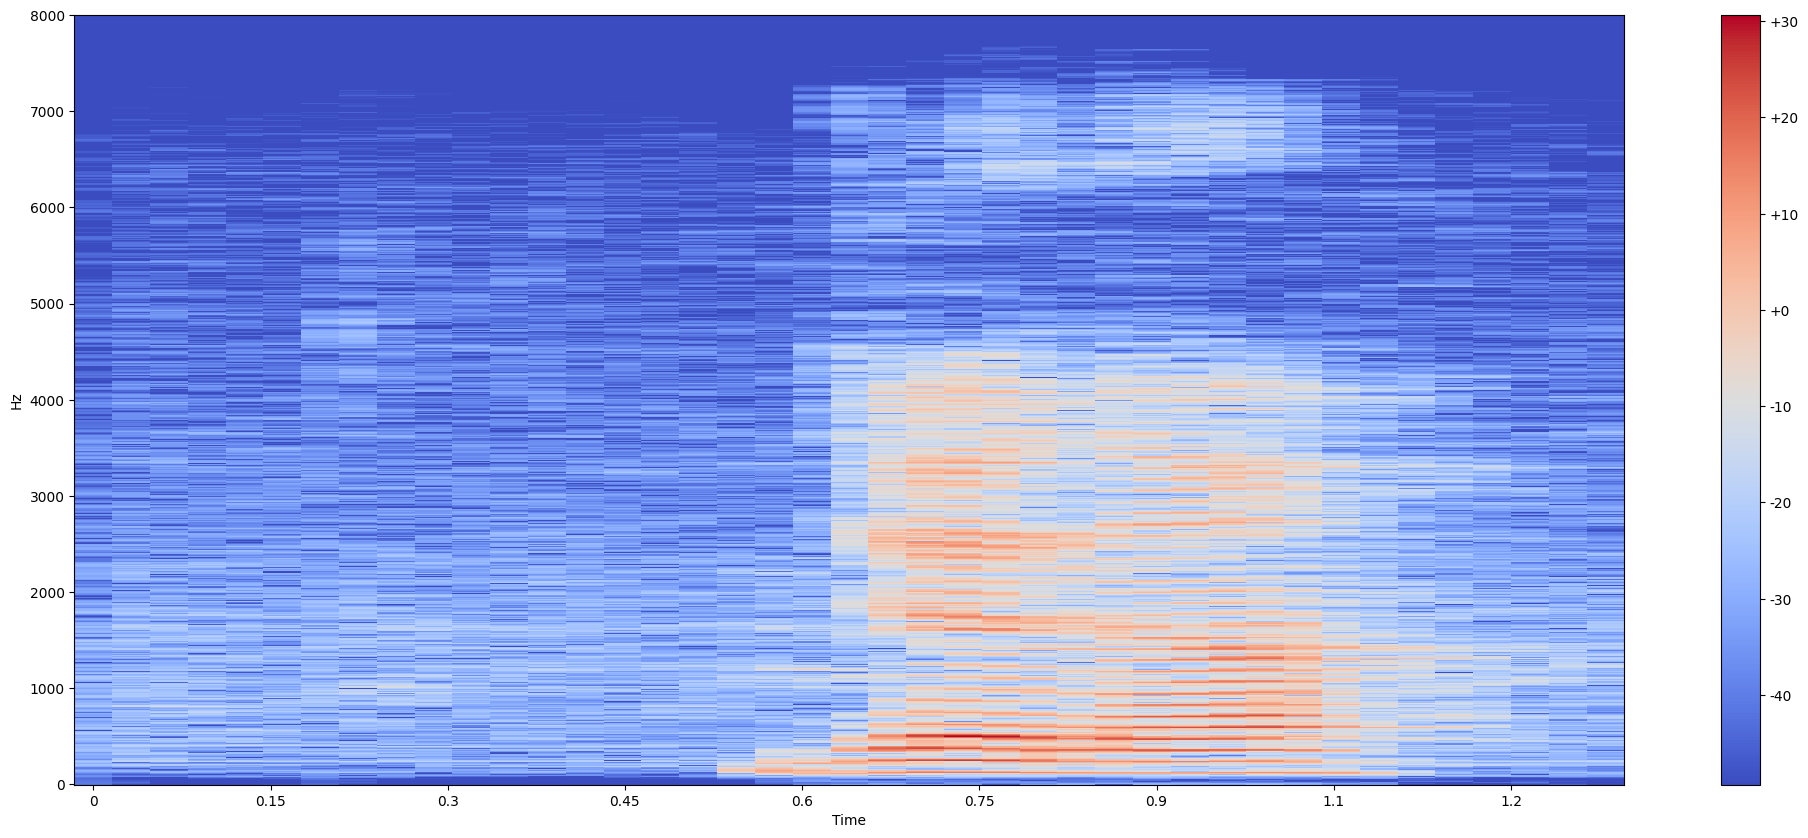

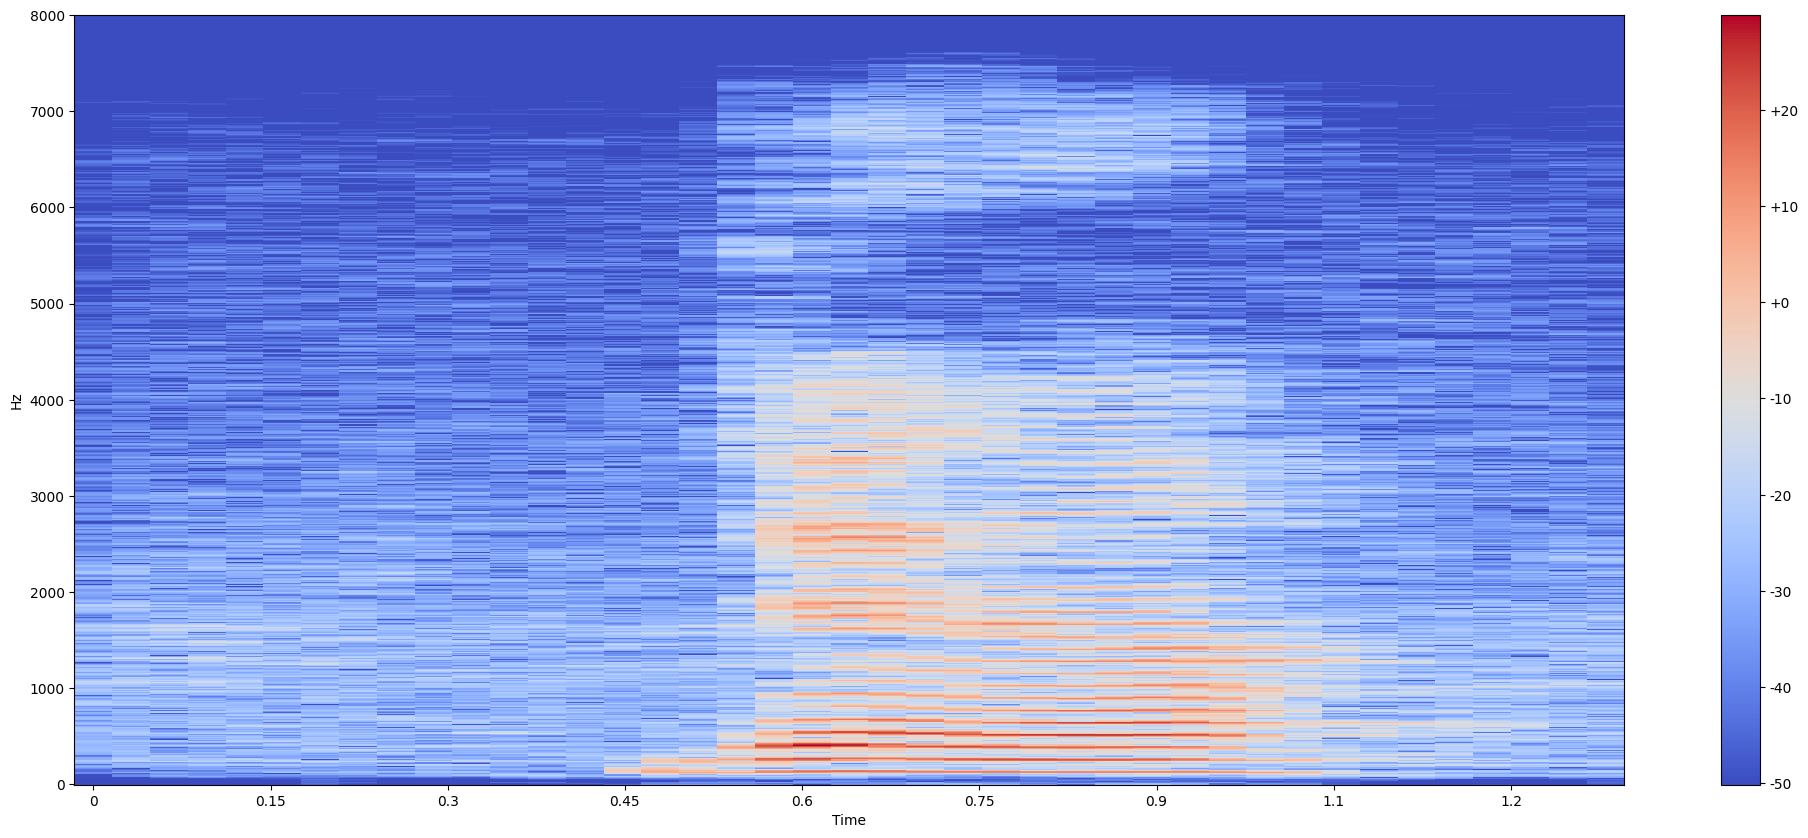

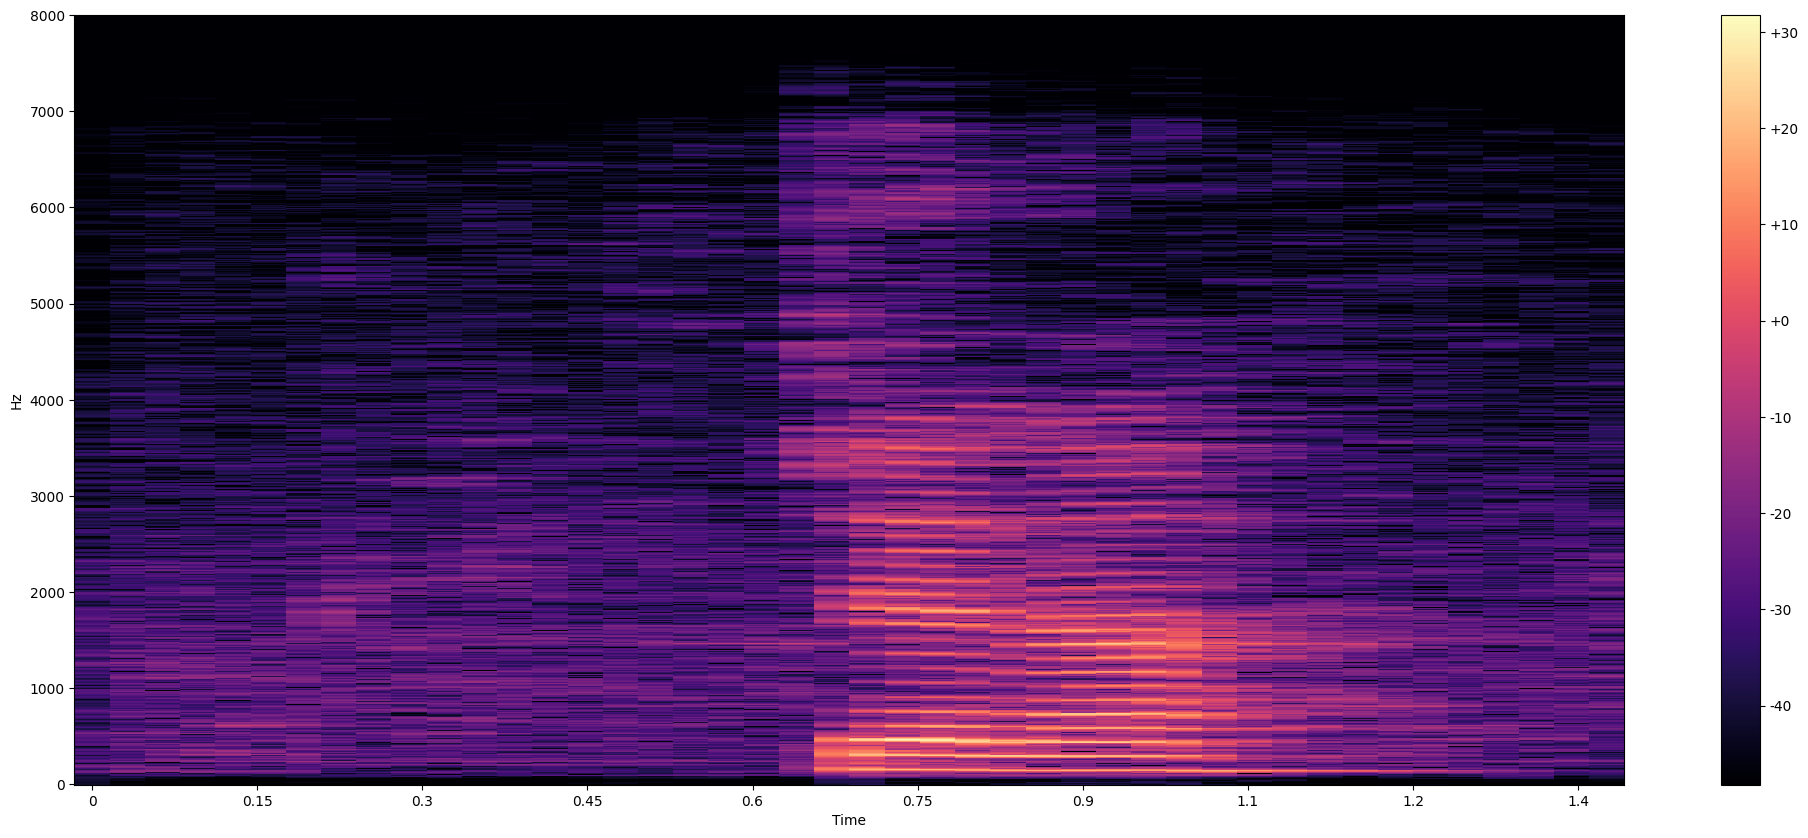

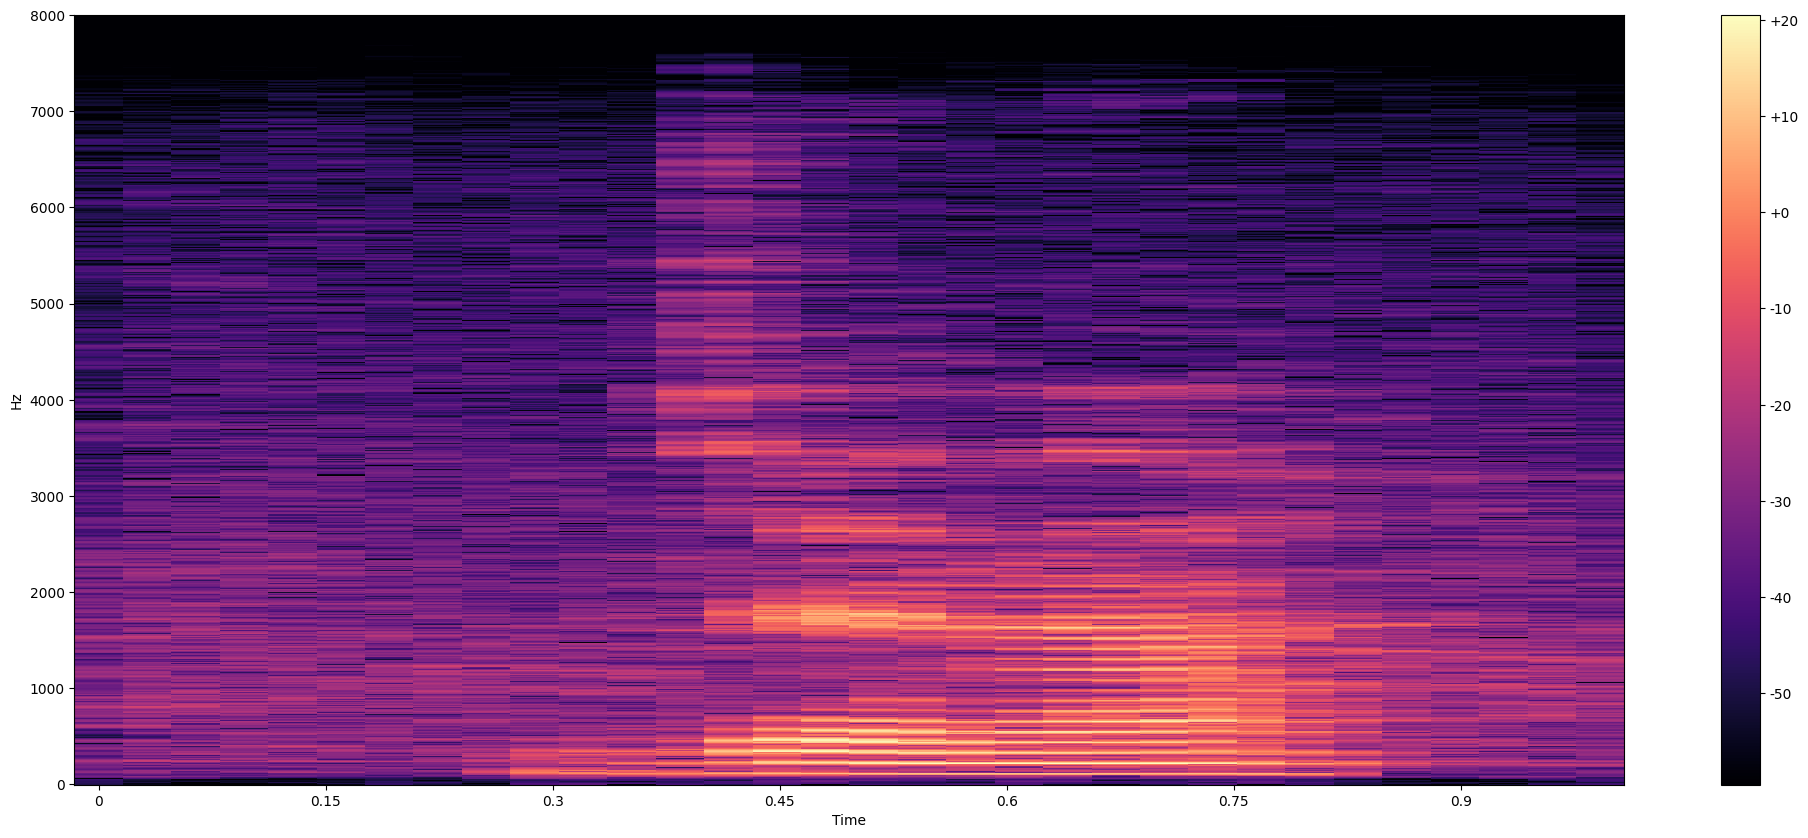

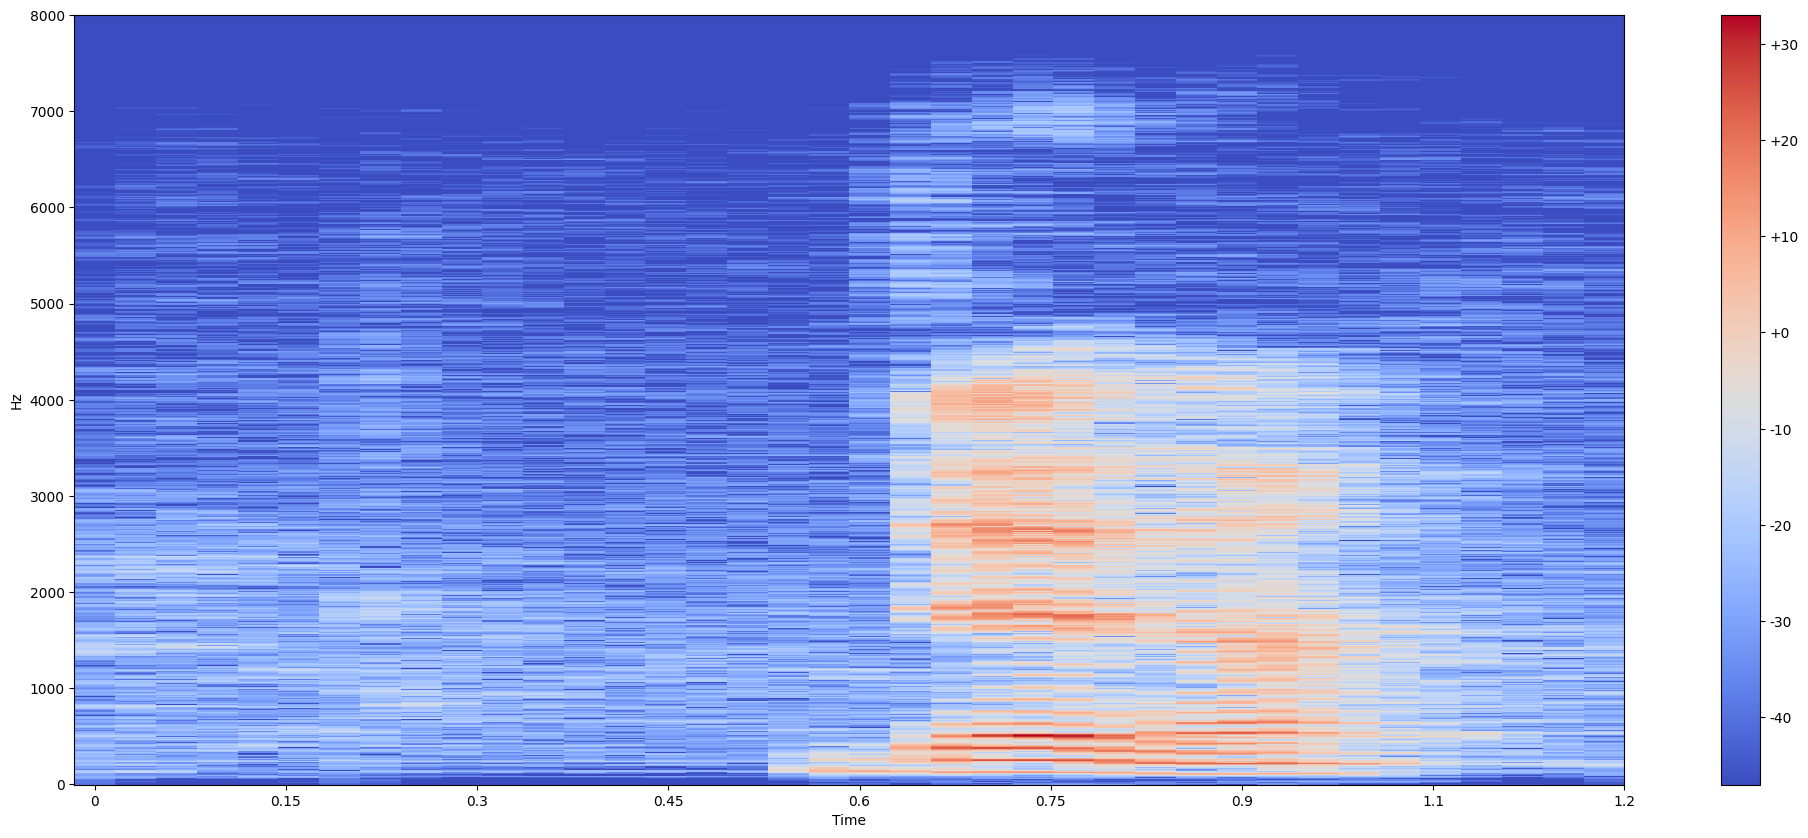

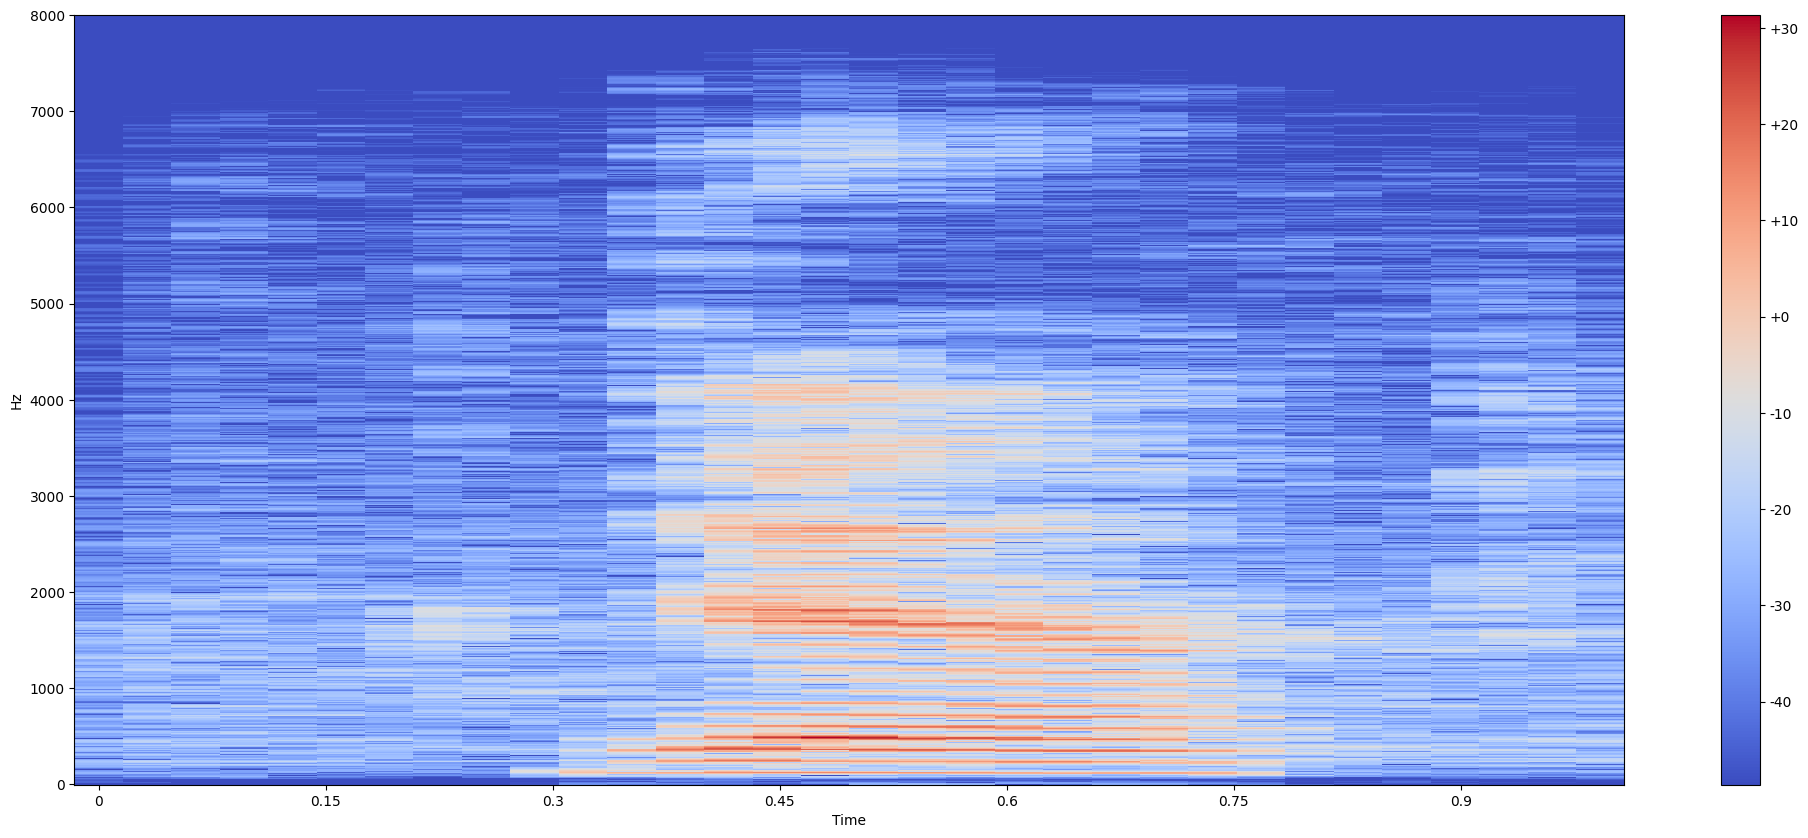

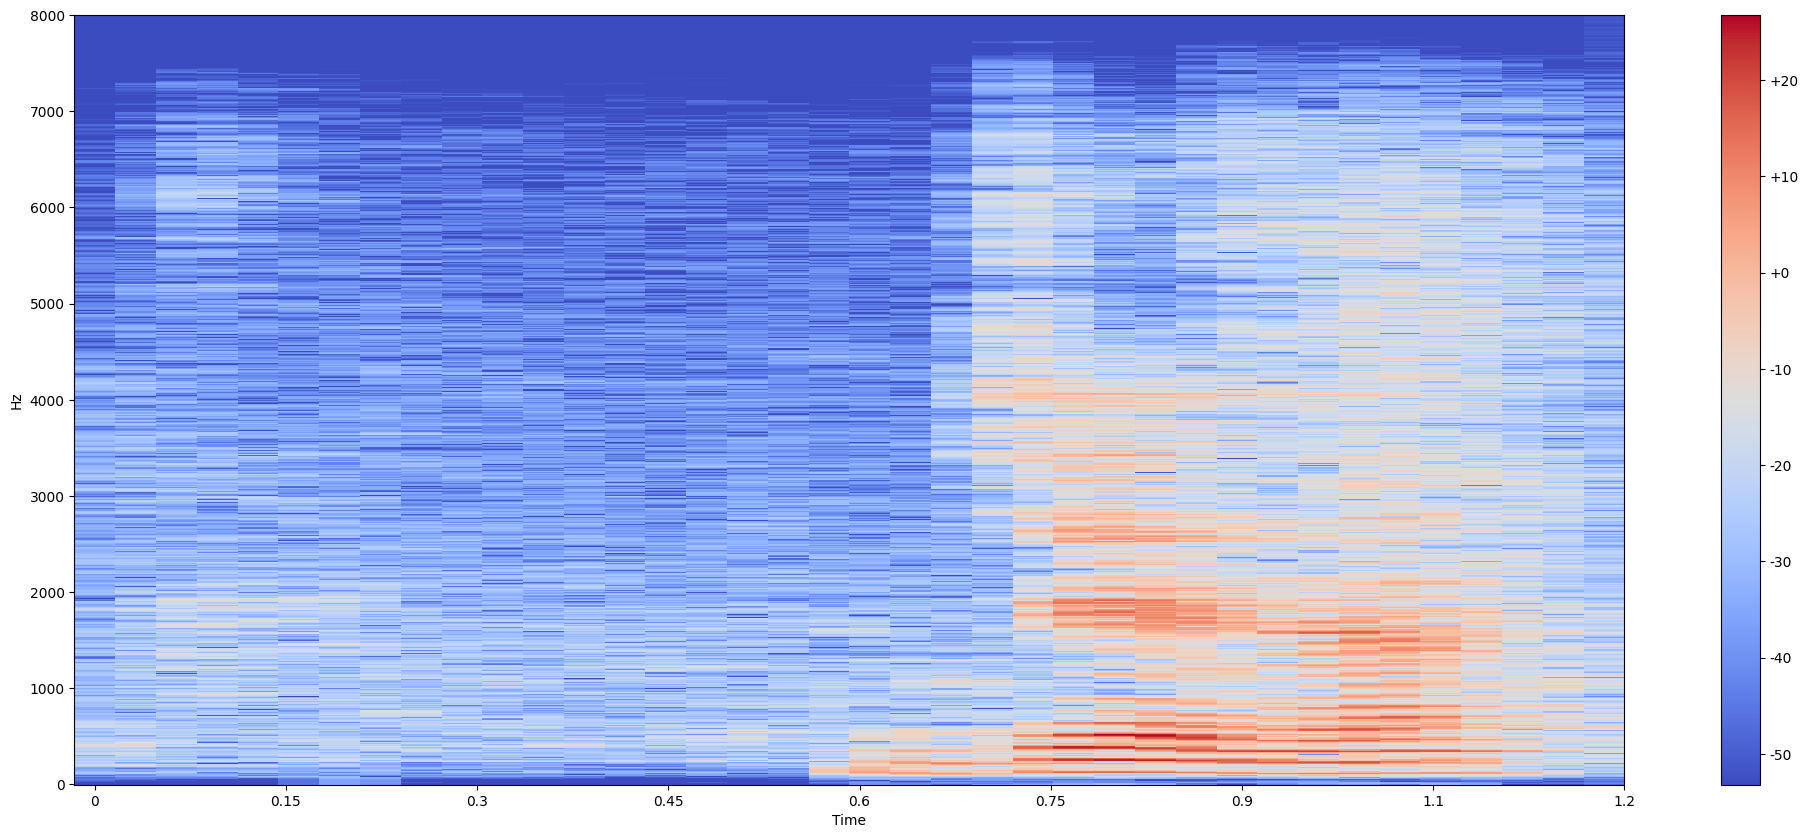

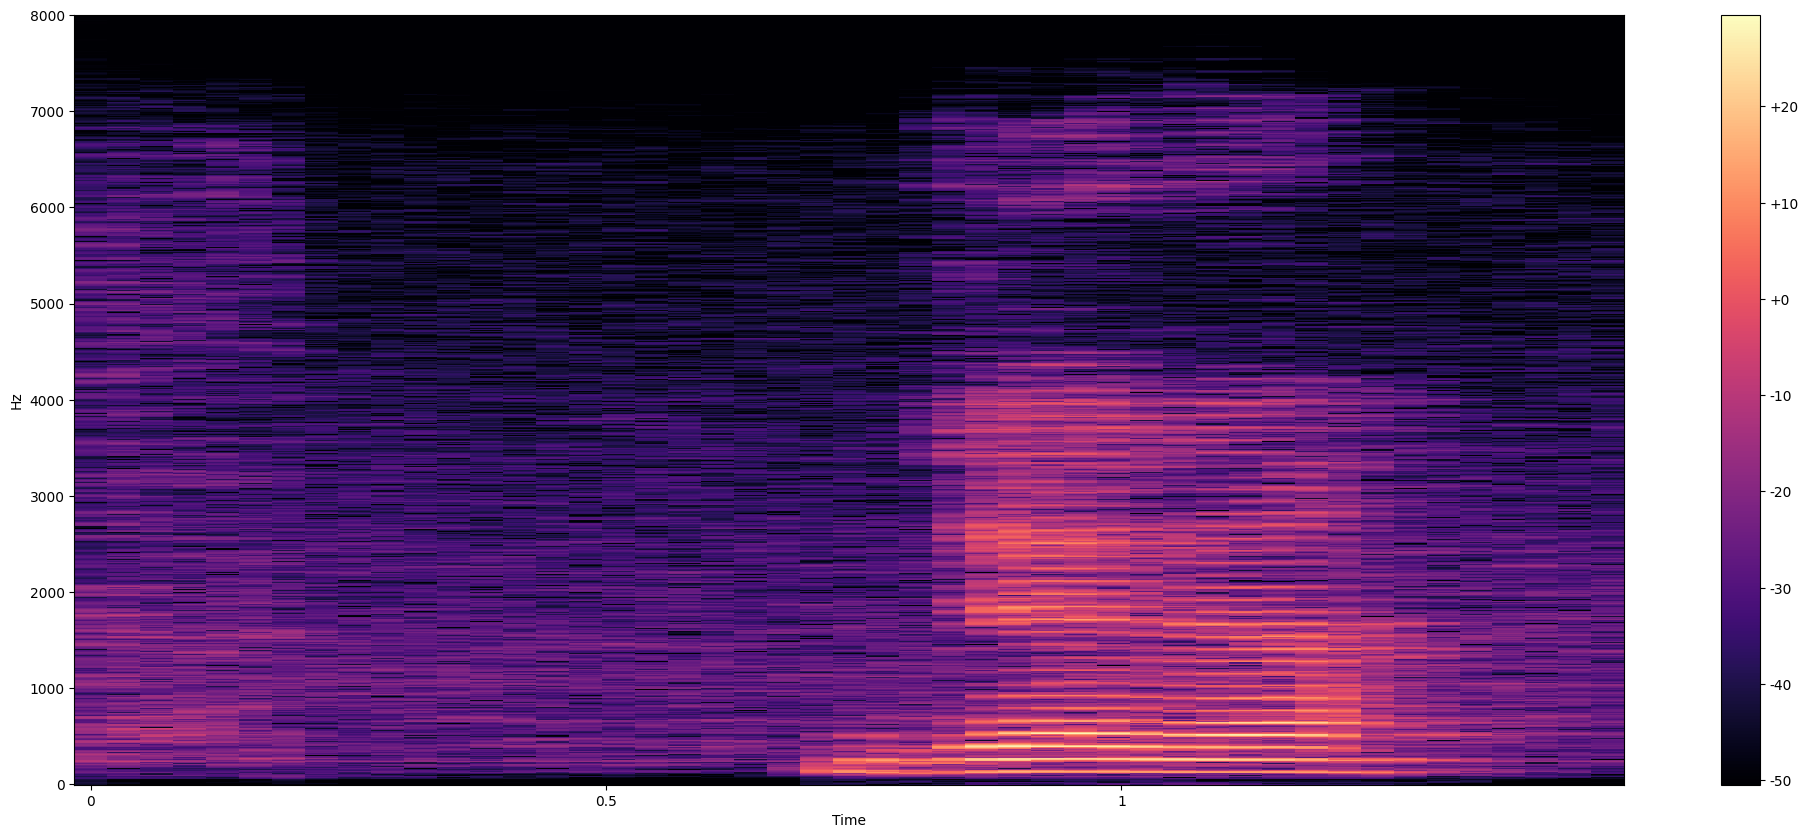

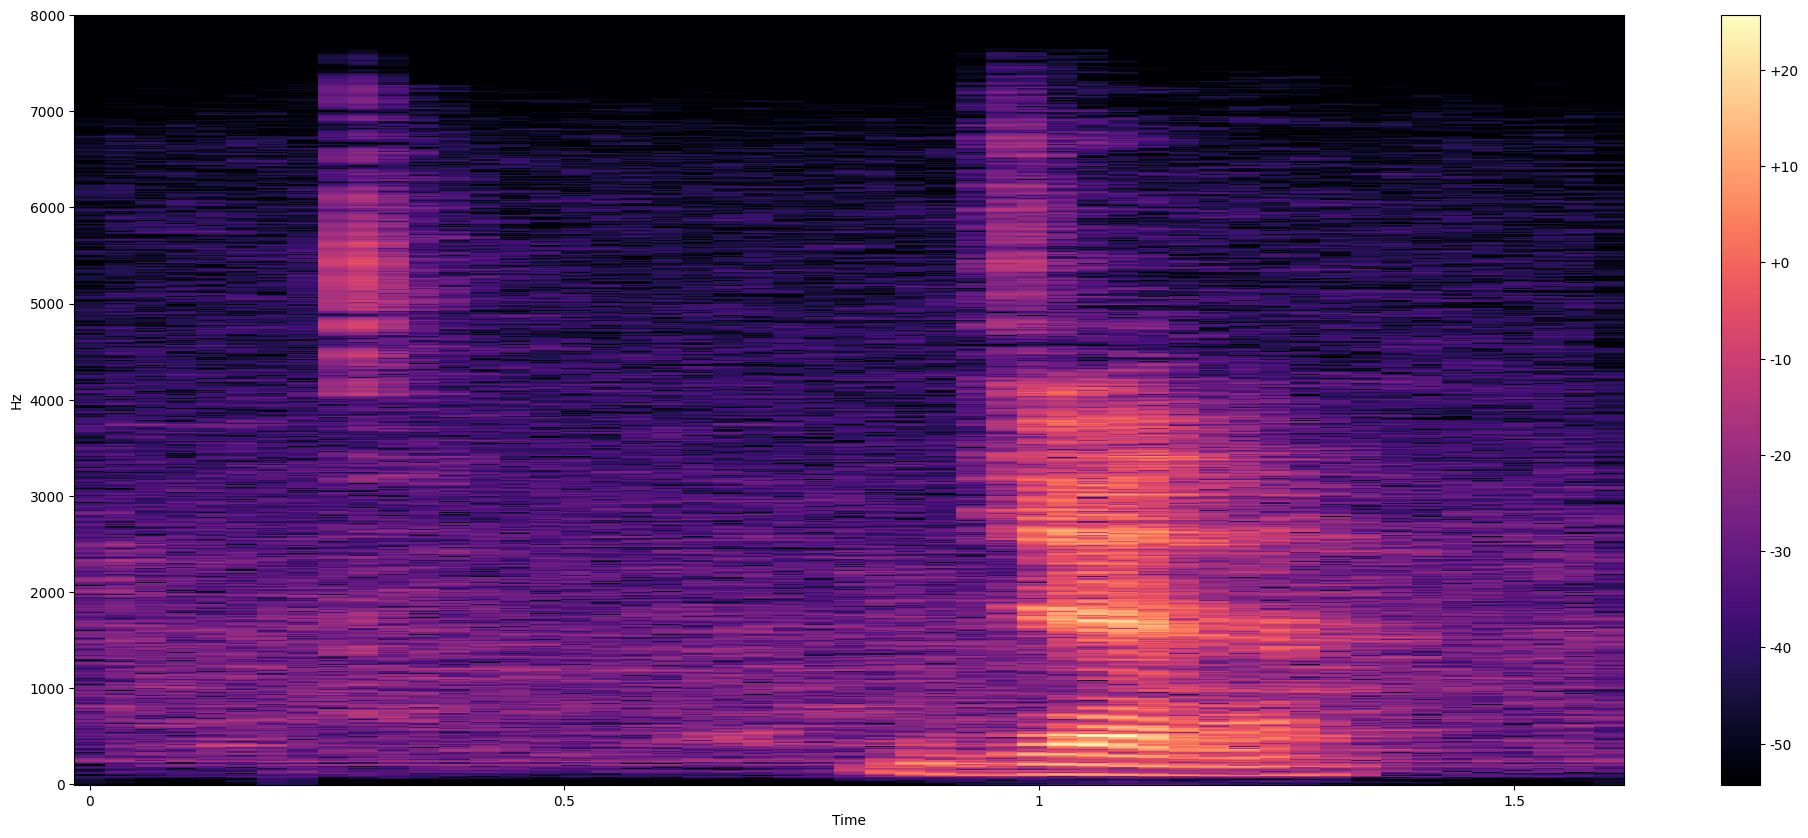

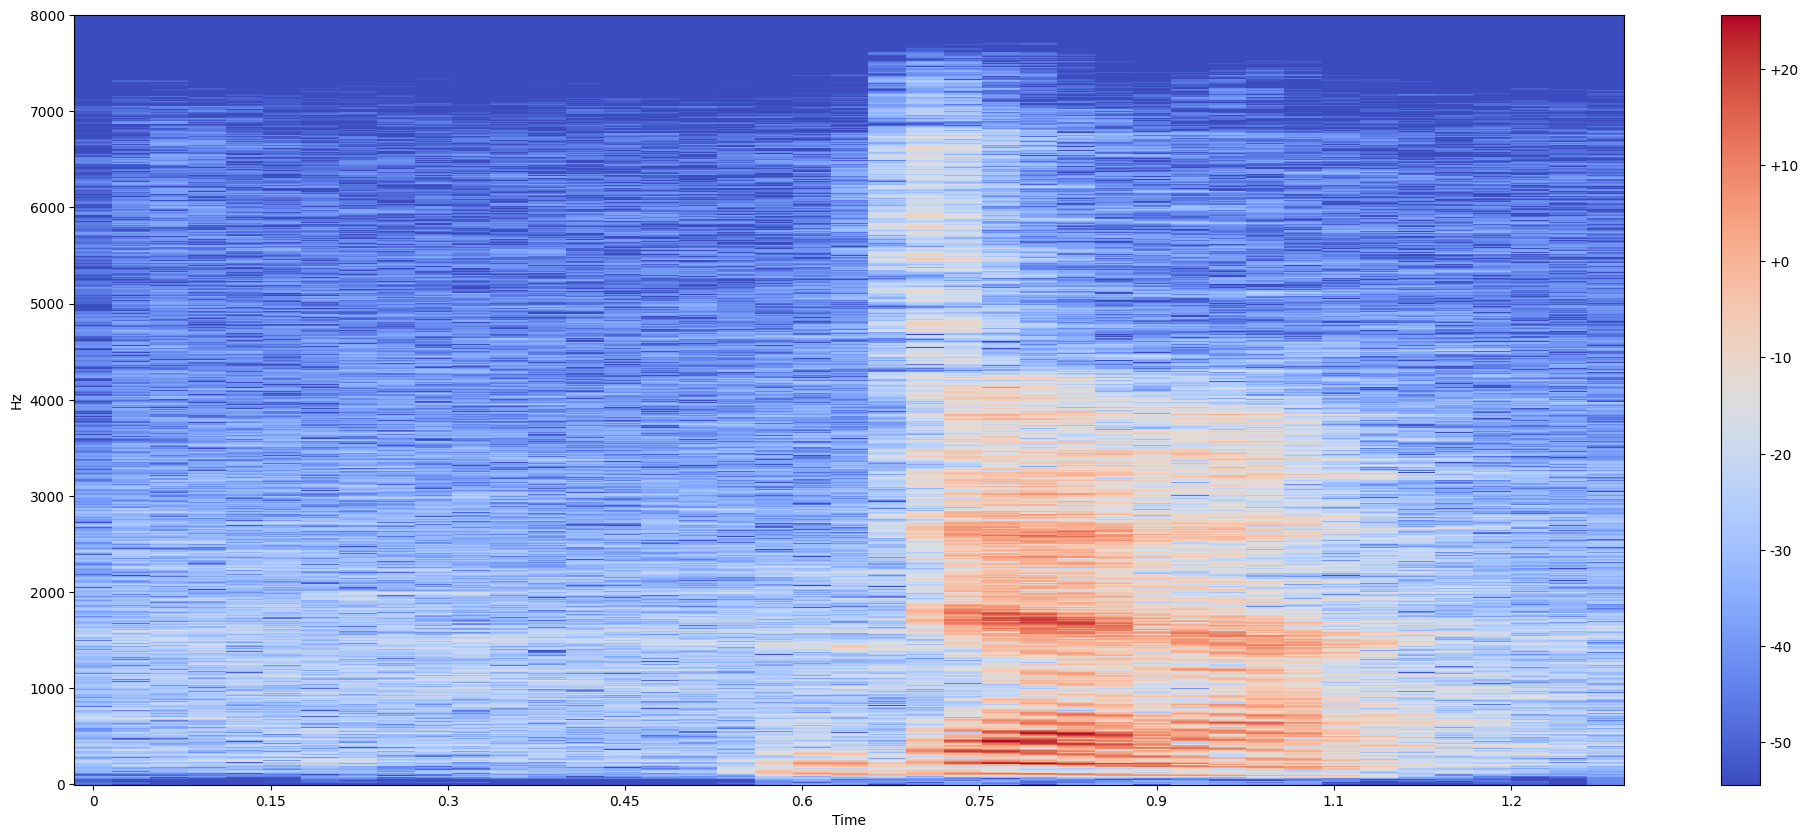

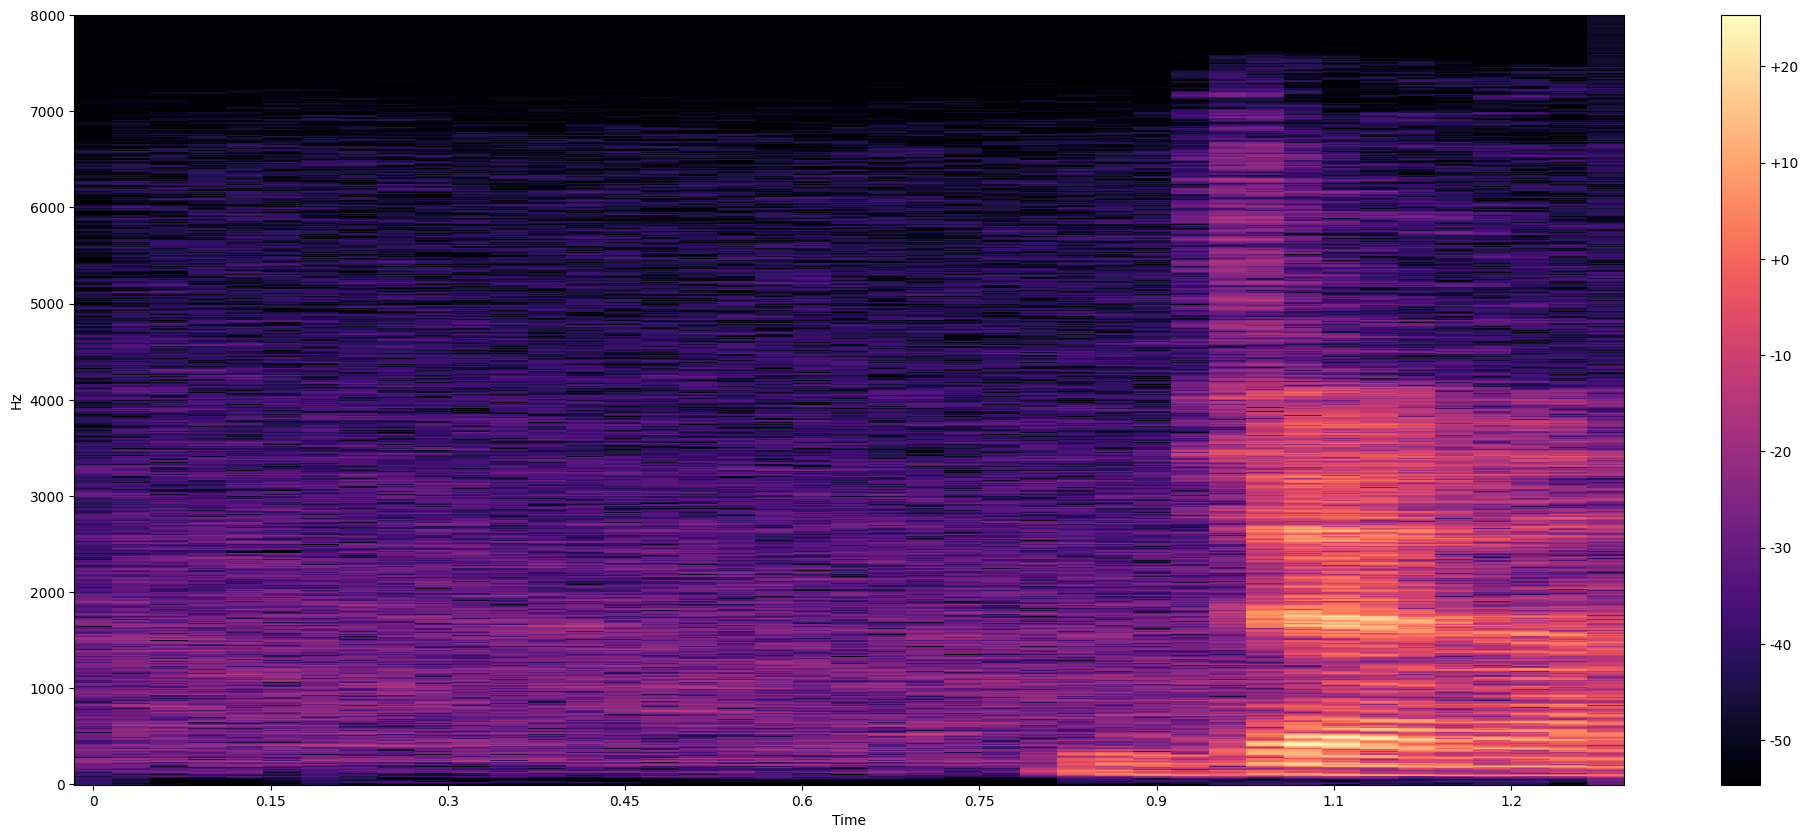

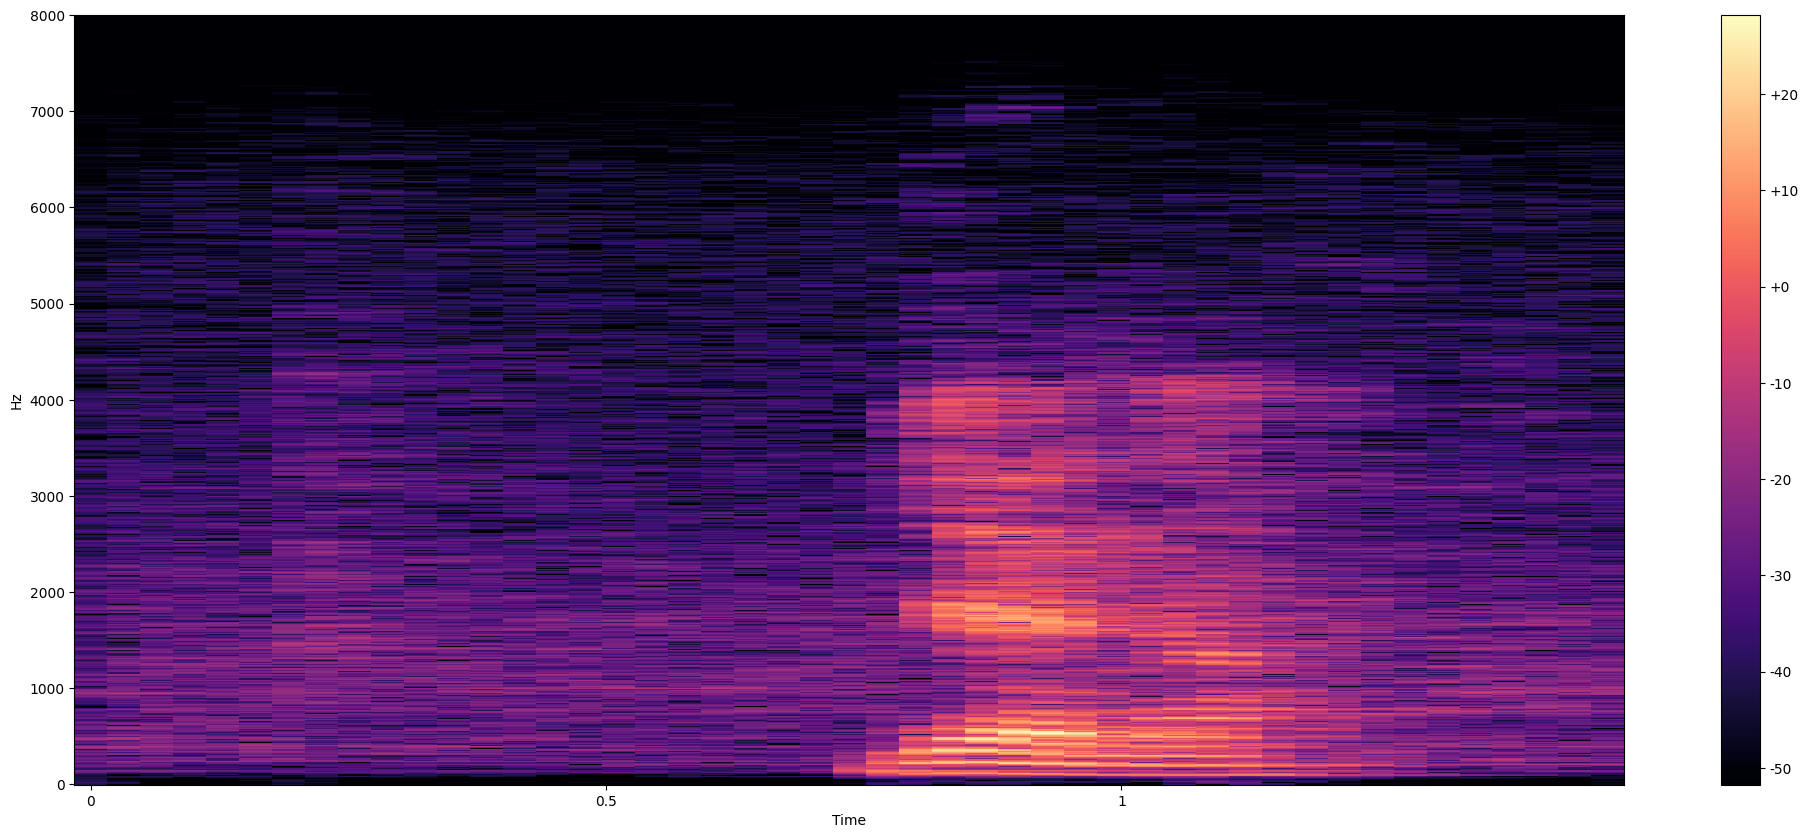

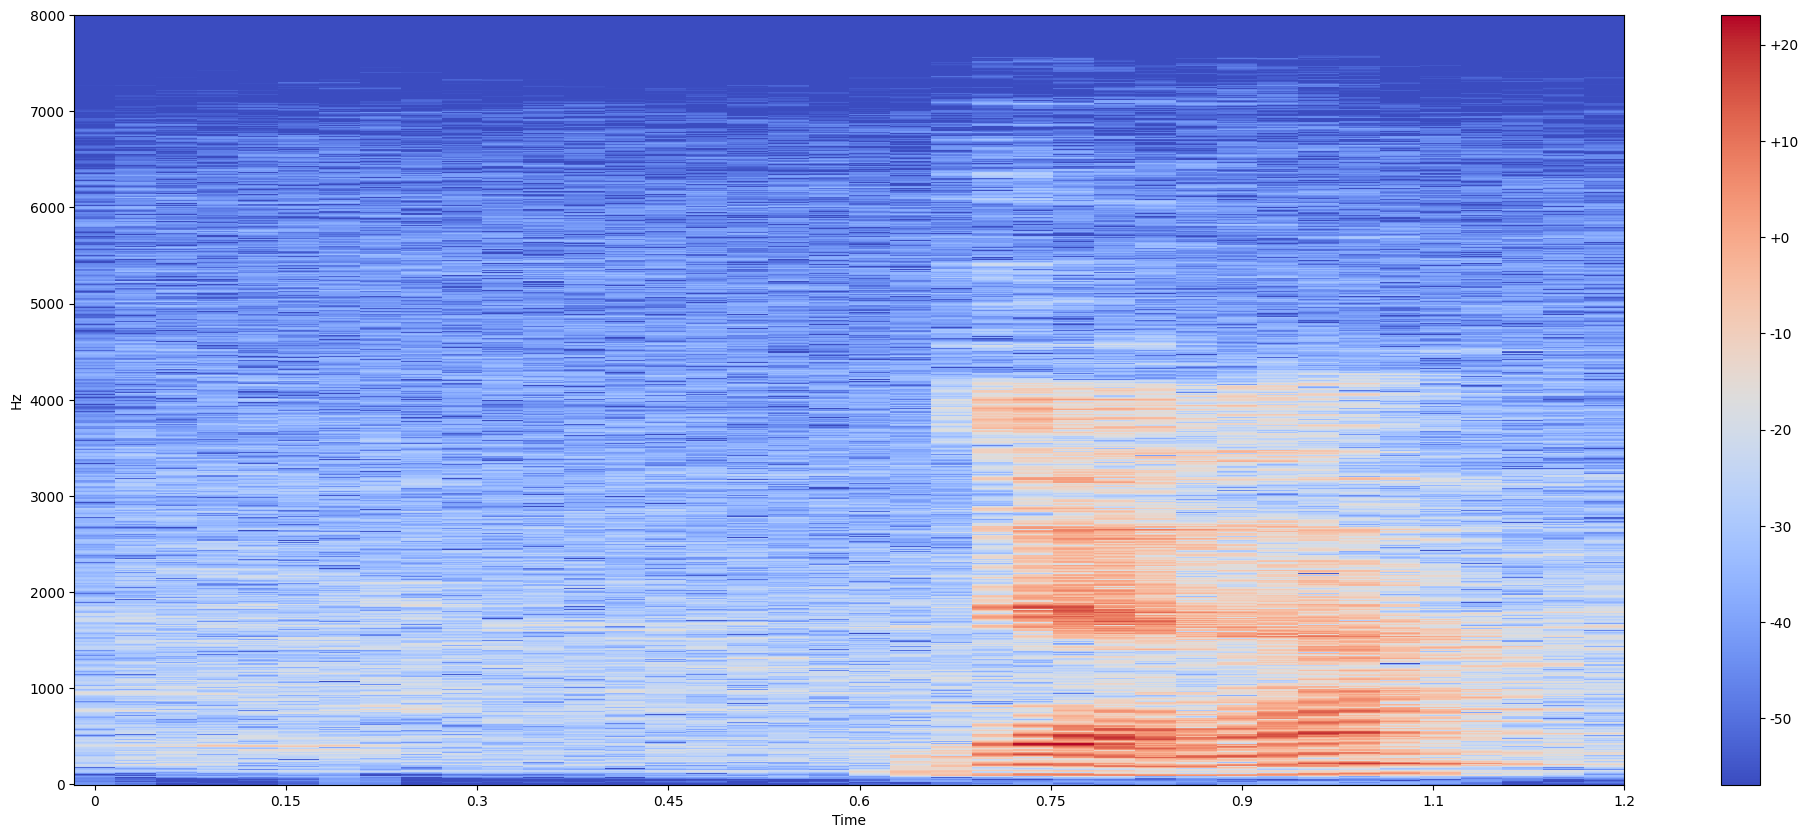

In [42]:
FRAME_SIZE = 2048
HOP_SIZE = 512

max_example = 19
count = 0
os.chdir(label_data_path)
for filename in os.listdir():
    if count < max_example:
        rec_path = label_data_path + '/' + filename
        sig, sr = librosa.load(rec_path, sr=16000)
        freq_domain = librosa.stft(sig, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
        y_scale = np.abs(freq_domain) ** 2
        y_log_scale = librosa.power_to_db(y_scale)
        ipd.display(ipd.Audio(rec_path, rate=16000))
        plot_spectrogram(y_log_scale, sr, HOP_SIZE)
        count += 1